<a href="https://colab.research.google.com/github/venssss/akbarrrrrr/blob/main/TUGAS_1_AVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Membaca data CSV
data = pd.read_csv('emisi.csv')
# Melihat 5 data pertama
print(data.head())

   Ville (L/100 km)  Route (L/100 km)  kombinasi (L/100 km)  Emisi CO2 (g/km)
0               8.1               6.5                   7.4               172
1               8.9               6.5                   7.8               181
2              11.1               8.3                   9.9               230
3              12.6               9.4                  11.2               263
4              13.8              11.2                  12.4               291


Menampilkan lima baris awal dari dataset emisi.csv untuk memperoleh gambaran tentang struktur data.

In [ ]:
data.rename(columns={'X': 'Ville (L/100 km)', 'Y': 'Emisi CO2 (g/km)'}, inplace=True)
print(data)

     Ville (L/100 km)  Route (L/100 km)  kombinasi (L/100 km)  \
0                 8.1               6.5                   7.4   
1                 8.9               6.5                   7.8   
2                11.1               8.3                   9.9   
3                12.6               9.4                  11.2   
4                13.8              11.2                  12.4   
..                ...               ...                   ...   
637               9.7               7.5                   8.7   
638              10.7               8.1                   9.5   
639              10.1               7.8                   9.1   
640              10.0               7.8                   9.0   
641              11.5               9.0                  10.4   

     Emisi CO2 (g/km)  
0                 172  
1                 181  
2                 230  
3                 263  
4                 291  
..                ...  
637               205  
638               223  
639

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)

                      Ville (L/100 km)  Route (L/100 km)  \
Ville (L/100 km)              1.000000          0.909671   
Route (L/100 km)              0.909671          1.000000   
kombinasi (L/100 km)          0.986990          0.961539   
Emisi CO2 (g/km)              0.975617          0.951061   

                      kombinasi (L/100 km)  Emisi CO2 (g/km)  
Ville (L/100 km)                  0.986990          0.975617  
Route (L/100 km)                  0.961539          0.951061  
kombinasi (L/100 km)              1.000000          0.988786  
Emisi CO2 (g/km)                  0.988786          1.000000  


Menampilkan matriks korelasi antar variabel untuk mengidentifikasi seberapa kuat hubungan antara konsumsi bahan bakar dan emisi CO₂.


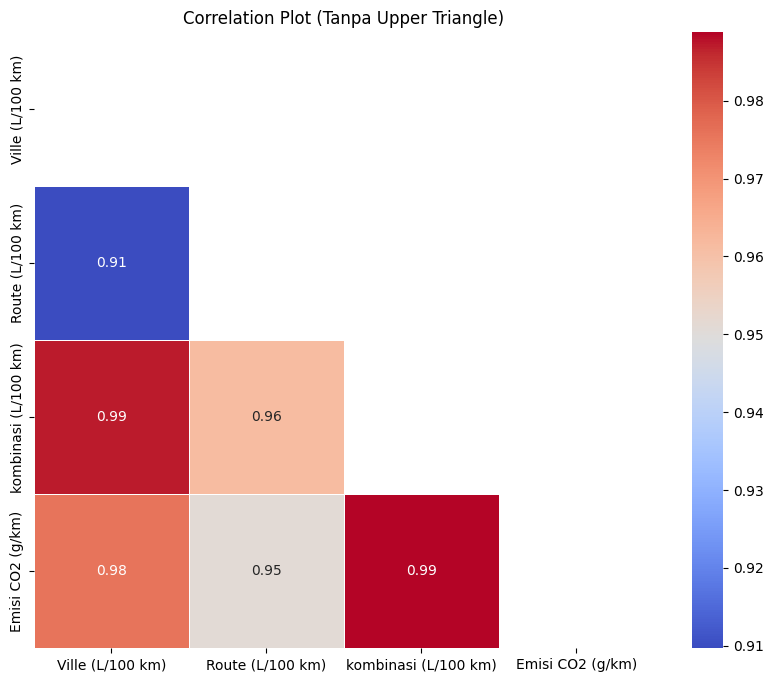

In [ ]:
# Membuat heatmap tanpa upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot (Tanpa Upper Triangle)')
plt.show()

Plot heatmap yang menggambarkan hubungan antar variabel, di mana warna merepresentasikan tingkat korelasi positif atau negatif.

<Axes: xlabel='Ville (L/100 km)', ylabel='Emisi CO2 (g/km)'>

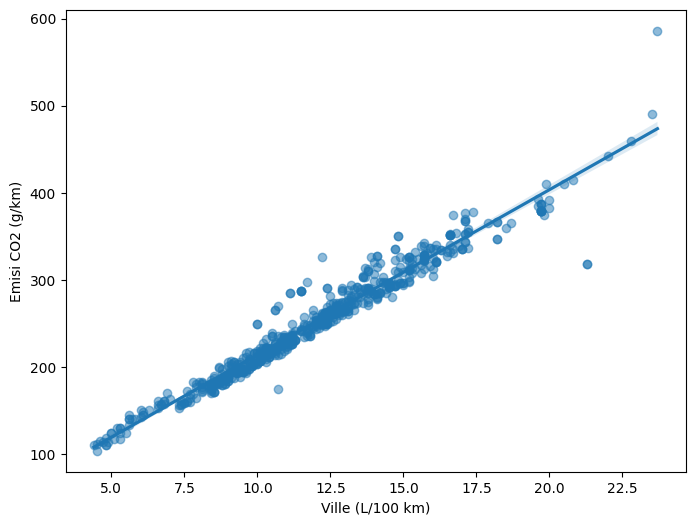

In [ ]:
# Scatter plot dengan regresi
plt.figure(figsize=(8, 6))
sns.regplot(x="Ville (L/100 km)", y="Emisi CO2 (g/km)", data=data, scatter_kws={"alpha": 0.5})

Memplot scatter plot antara konsumsi bahan bakar dan emisi CO₂, dilengkapi dengan garis regresi untuk menunjukkan indikasi hubungan linear.

In [ ]:
# Model regresi sederhana
X = data[["Ville (L/100 km)"]]
Y = data["Emisi CO2 (g/km)"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Emisi CO2 (g/km)   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:56:22   Log-Likelihood:                -2618.3
No. Observations:                 642   AIC:                             5241.
Df Residuals:                     640   BIC:                             5250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               24.7691      2.096  

Menampilkan ringkasan model regresi (model.summary()) yang mencakup nilai koefisien, R², p-value, serta metrik lainnya untuk mengevaluasi performa model.

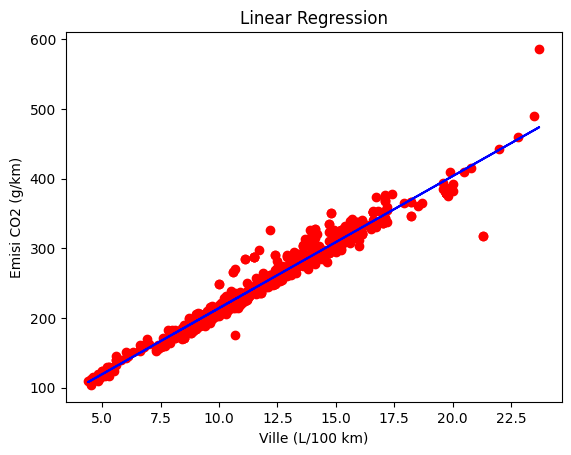

In [ ]:
# Visualisasi hasil prediksi
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
plt.scatter(X["Ville (L/100 km)"], Y, color='red')
plt.plot(X["Ville (L/100 km)"], lin_reg.predict(X), color='blue')
plt.title('Linear Regression')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

Grafik scatter plot dengan garis biru yang merepresentasikan hasil regresi linear, guna mengevaluasi kecocokan model terhadap data aktual.

In [ ]:
# Evaluasi model
mse = mean_squared_error(Y, prediksi)
mae = mean_absolute_error(Y, prediksi)
r2 = r2_score(Y, prediksi)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 204.1479
Mean Absolute Error (MAE): 9.0293
R-squared (R²): 0.9518


Menampilkan metrik evaluasi, yaitu Mean Squared Error (MSE), Mean Absolute Error (MAE), dan R², untuk menilai seberapa baik model dalam memprediksi data.

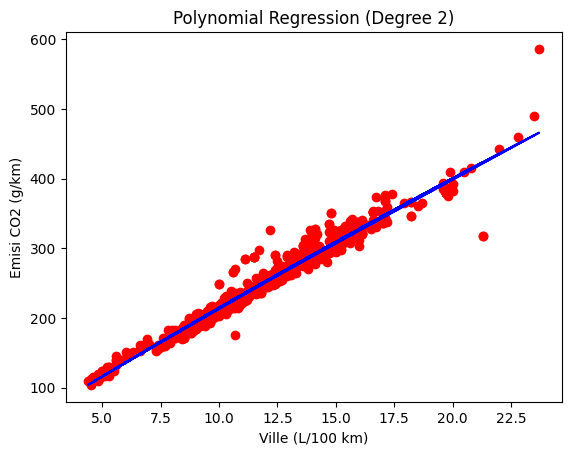

In [ ]:
# Visualisasi Polynomial Regression
plt.scatter(X["Ville (L/100 km)"], Y, color='red')
plt.plot(X["Ville (L/100 km)"], lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

Grafik scatter plot dengan garis regresi polinomial untuk memperlihatkan bagaimana model menyesuaikan kurva terhadap data.

In [ ]:
# Evaluasi model polynomial
Y_poly = lin_reg_2.predict(X_poly)
mse_poly = mean_squared_error(Y, Y_poly)
mae_poly = mean_absolute_error(Y, Y_poly)
r2_poly = r2_score(Y, Y_poly)
print(f"Mean Squared Error (MSE Poly): {mse_poly:.4f}")
print(f"Mean Absolute Error (MAE Poly): {mae_poly:.4f}")
print(f"R-squared (R² Poly): {r2_poly:.4f}")

Mean Squared Error (MSE Poly): 202.7943
Mean Absolute Error (MAE Poly): 9.0976
R-squared (R² Poly): 0.9521


Menampilkan metrik evaluasi regresi polinomial (MSE, MAE, R²) dan membandingkannya dengan model linear untuk menentukan model yang lebih akurat.